In [1]:
from ecs.lib import DatFile
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
%matplotlib ipympl


In [2]:
# DAT_FILE_PATH = '../temp/event_cube.dat'
# DAT_FILE_PATH = '../temp/test_scene_events.dat'
DAT_FILE_PATH = '../out/winterthur/events.dat'

In [3]:
dat = DatFile(DAT_FILE_PATH)

ts, x, y, pol = dat.load()

In [4]:

i = 0
for e in zip(ts, x, y, pol):
    print(e)
    
    if i > 10:
        break

    i += 1

(0, 601, 265, 1)
(0, 486, 199, 1)
(0, 165, 352, 1)
(0, 378, 303, 1)
(0, 478, 347, 1)
(0, 314, 205, 1)
(0, 267, 225, 1)
(0, 293, 325, 0)
(0, 283, 196, 1)
(0, 444, 310, 1)
(0, 41, 329, 1)
(0, 52, 318, 1)


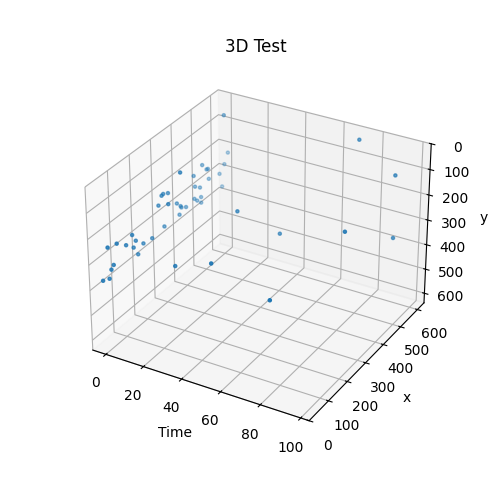

In [5]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection='3d')

ax.set_xlabel('Time')
ax.set_ylabel('x')
ax.set_zlabel('y')

ax.set_ylim(0, 640)
ax.set_zlim(0, 640)

plt.gca().invert_zaxis()

WINDOW_SIZE = 100
events = zip(ts, x, y, pol)

def get_frame(i):
    start = i * WINDOW_SIZE
    end = start + WINDOW_SIZE

    ts_f = ts[(ts >= start) & (ts < end)]

    if len(ts_f) == 0:
        return np.array([0]), np.array([0]), np.array([0]), np.array([0])

    start_index = np.where(ts == ts_f[0])[0][0]
    end_index = np.where(ts == ts_f[-1])[0][-1] + 1

    x_f = x[start_index:end_index]
    y_f = y[start_index:end_index]

    pol_f = pol[start_index:end_index]

    return ts_f, x_f, y_f, pol_f

ts_f, x_f, y_f, pol_f = get_frame(0)
scat = ax.scatter(ts_f, x_f, y_f, s=5)
title = ax.set_title('3D Test')

def update(frame):
    print(frame)
    ts_f, x_f, y_f, pol_f = get_frame(frame)

    scat.set_data(ts_f, x_f)
    scat.set_3d_properties(y_f)
    title.set_text('3D Test, time={}'.format(frame))

    return title, scat


ani = animation.FuncAnimation(fig=fig, func=update, frames=1000, interval=30, blit=True)

plt.show()
# plt.rcParams['animation.ffmpeg_path']='/opt/homebrew/bin/ffmpeg'
# ani.save('test.mp4')
# plt.show()


In [6]:
ani.pause()

In [7]:
df = pd.DataFrame(zip(ts, x, y, pol), columns=['timestamp', 'x', 'y', 'polarity'])
df

,timestamp,x,y,polarity
0,0,601,265,1
1,0,486,199,1
2,0,165,352,1
3,0,378,303,1
4,0,478,347,1
...,...,...,...,...
583,4776,156,178,1
584,4788,532,317,1
585,5110,420,268,1
586,5472,591,193,1


In [8]:
time_window = 500

df = df.sort_values(by='timestamp')

# Normalize timestamps
start_time = df['timestamp'].min()
df['timestamp'] -= start_time

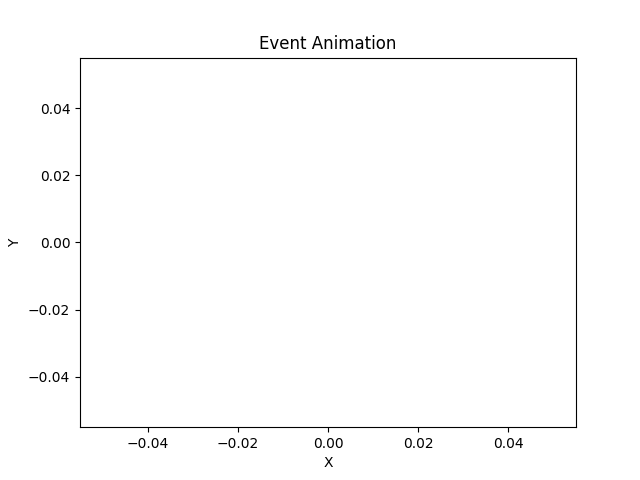

In [9]:
fig, ax = plt.subplots()
sc = ax.scatter([], [], s=2)

colors = { 0: 'red', 1: 'blue' }

def init():
    ax.set_xlim(df['x'].min(), df['x'].max())
    ax.set_ylim(df['y'].min(), df['y'].max())
    return sc,

def update(frame):
    current_time = frame * time_window
    window_data = df[(df['timestamp'] >= current_time) & (df['timestamp'] < current_time + time_window)]
    
    x = window_data['x']
    y = window_data['y']
    c = window_data['polarity'].map(colors)

    sc.set_offsets(list(zip(x, y)))
    sc.set_color(c)
    return sc,

# --- ANIMATION ---
num_frames = (df['timestamp'].max() // time_window).astype(int)
ani = FuncAnimation(fig, update, frames=range(num_frames), init_func=init, blit=True, interval=50)

plt.title("Event Animation")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

ani.pause()